# Begin the Code and Mount Google Drive to access files

In [6]:
import os

# Comment these lines out if not using google colab
from google.colab import drive
drive.mount('/content/gdrive/')
os.chdir('/content/gdrive/My Drive/LLR_NN')

!ls

bpsk_model.json		 data_files_single_snr_fade  llr_model.h5
bpsk_single.json	 keras_export		     result_figures
data_files_multiple_snr  llr_bpsk_model.h5
data_files_single_snr	 llr_bpsk_model_single.h5


In [0]:
# Can comment the pip install if not using GPU
# Note that commenting this line out if your computer has a GPU will result in slower training times

# comment the %%capture line if not on google colab, this is to supress the output
%%capture
!pip install tensorflow-gpu==2.1.0

## Import Required Libraries

In [0]:
import numpy as np
import scipy.io as sio
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, MaxPooling1D
from tensorflow.keras.layers import Activation,Conv2D, Flatten, Permute, Cropping2D
from tensorflow.keras.layers import ZeroPadding2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Reshape
from tensorflow.keras.layers import Conv1D, GRU
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
import matplotlib.pyplot as plt

# Load the Data

In [9]:
MODULATION = "BPSK"
SNR = "1.8"
FADE_VAR = "0.01"
SNR_RANGE_MIN = "0"
SNR_RANGE_MAX = "10"

# Load the training data
X_train_single_SNR = np.genfromtxt("./data_files_single_snr/" + MODULATION + "_X_train_snr_" + SNR + ".csv", delimiter=',')
y_train_single_SNR = np.genfromtxt("./data_files_single_snr/" + MODULATION + "_y_train_snr_" + SNR + ".csv", delimiter=',')
X_train_multiple_SNR = np.genfromtxt("./data_files_multiple_snr/" + MODULATION + "_X_train_snr_range_" + SNR_RANGE_MIN + "_" + SNR_RANGE_MAX + ".csv", delimiter=',')
y_train_multiple_SNR = np.genfromtxt("./data_files_multiple_snr/" + MODULATION + "_y_train_snr_range_" + SNR_RANGE_MIN + "_" + SNR_RANGE_MAX + ".csv", delimiter=',')
X_train_single_SNR_fade = np.genfromtxt("./data_files_single_snr_fade/" + MODULATION + "_X_train_snr_" + SNR + "_fade_var_" + FADE_VAR + ".csv", delimiter=',')
y_train_single_SNR_fade = np.genfromtxt("./data_files_single_snr_fade/" + MODULATION + "_y_train_snr_" + SNR + "_fade_var_" + FADE_VAR + ".csv", delimiter=',')

# Load validation data
X_valid_single_SNR = np.genfromtxt("./data_files_single_snr/" + MODULATION + "_X_valid_snr_" + SNR + ".csv", delimiter=',')
y_valid_single_SNR = np.genfromtxt("./data_files_single_snr/" + MODULATION + "_y_valid_snr_" + SNR + ".csv", delimiter=',')
X_valid_multiple_SNR = np.genfromtxt("./data_files_multiple_snr/" + MODULATION + "_X_valid_snr_range_" + SNR_RANGE_MIN + "_" + SNR_RANGE_MAX + ".csv", delimiter=',')
y_valid_multiple_SNR = np.genfromtxt("./data_files_multiple_snr/" + MODULATION + "_y_valid_snr_range_" + SNR_RANGE_MIN + "_" + SNR_RANGE_MAX + ".csv", delimiter=',')
X_valid_single_SNR_fade = np.genfromtxt("./data_files_single_snr_fade/" + MODULATION + "_X_valid_snr_" + SNR + "_fade_var_" + FADE_VAR + ".csv", delimiter=',')
y_valid_single_SNR_fade = np.genfromtxt("./data_files_single_snr_fade/" + MODULATION + "_y_valid_snr_" + SNR + "_fade_var_" + FADE_VAR + ".csv", delimiter=',')

# Load the test data
X_test_single_SNR = np.genfromtxt("./data_files_single_snr/" + MODULATION + "_X_test_snr_" + SNR + ".csv", delimiter=',')
y_test_single_SNR = np.genfromtxt("./data_files_single_snr/" + MODULATION + "_y_test_snr_" + SNR + ".csv", delimiter=',')
X_test_multiple_SNR = np.genfromtxt("./data_files_multiple_snr/" + MODULATION + "_X_test_snr_range_" + SNR_RANGE_MIN + "_" + SNR_RANGE_MAX + ".csv", delimiter=',')
y_test_multiple_SNR = np.genfromtxt("./data_files_multiple_snr/" + MODULATION + "_y_test_snr_range_" + SNR_RANGE_MIN + "_" + SNR_RANGE_MAX + ".csv", delimiter=',')
X_test_single_SNR_fade = np.genfromtxt("./data_files_single_snr_fade/" + MODULATION + "_X_test_snr_" + SNR + "_fade_var_" + FADE_VAR + ".csv", delimiter=',')
y_test_single_SNR_fade = np.genfromtxt("./data_files_single_snr_fade/" + MODULATION + "_y_test_snr_" + SNR + "_fade_var_" + FADE_VAR + ".csv", delimiter=',')

# Reshape the data
X_train_single_SNR = X_train_single_SNR.T
X_valid_single_SNR = X_valid_single_SNR.T
X_test_single_SNR = X_test_single_SNR.T
X_train_multiple_SNR = X_train_multiple_SNR.T
X_valid_multiple_SNR = X_valid_multiple_SNR.T
X_test_multiple_SNR = X_test_multiple_SNR.T
X_train_single_SNR_fade = X_train_single_SNR_fade.T
X_valid_single_SNR_fade = X_valid_single_SNR_fade.T
X_test_single_SNR_fade = X_test_single_SNR_fade.T

y_train_single_SNR = y_train_single_SNR.T
y_valid_single_SNR = y_valid_single_SNR.T
y_test_single_SNR = y_test_single_SNR.T
y_train_multiple_SNR = y_train_multiple_SNR.T
y_valid_multiple_SNR = y_valid_multiple_SNR.T
y_test_multiple_SNR = y_test_multiple_SNR.T
y_train_single_SNR_fade = y_train_single_SNR_fade.T
y_valid_single_SNR_fade = y_valid_single_SNR_fade.T
y_test_single_SNR_fade = y_test_single_SNR_fade.T

# Special case for M=2 since the data imported was only 1D
if(len(y_train_single_SNR.shape) == 1):
  y_train_single_SNR = y_train_single_SNR.reshape([-1,1])
  y_valid_single_SNR = y_valid_single_SNR.reshape([-1,1])
  y_test_single_SNR = y_test_single_SNR.reshape([-1,1])
  y_train_multiple_SNR = y_train_multiple_SNR.reshape([-1,1])
  y_valid_multiple_SNR = y_valid_multiple_SNR.reshape([-1,1])
  y_test_multiple_SNR = y_test_multiple_SNR.reshape([-1,1])
  y_train_single_SNR_fade = y_train_single_SNR_fade.reshape([-1,1])
  y_valid_single_SNR_fade = y_valid_single_SNR_fade.reshape([-1,1])
  y_test_single_SNR_fade = y_test_single_SNR_fade.reshape([-1,1])

print("Training data single SNR shape: \t\t", X_train_single_SNR.shape)
print("Validation data single SNR shape: \t\t",X_valid_single_SNR.shape)
print("Test data single SNR shape: \t\t\t" ,X_test_single_SNR.shape)

print()
print("Training label single SNR shape: \t\t", y_train_single_SNR.shape)
print("Validation label single SNR shape: \t\t", y_valid_single_SNR.shape)
print("Test label single SNR shape: \t\t\t", y_test_single_SNR.shape)

print("--------------------------------------------------------------------------")
print()
print("Training data multiple SNR shape: \t\t", X_train_multiple_SNR.shape)
print("Validation data multiple SNR shape: \t\t",X_valid_multiple_SNR.shape)
print("Test data multiple SNR shape: \t\t\t" ,X_test_multiple_SNR.shape)

print()
print("Training label multiple SNR shape: \t\t", y_train_multiple_SNR.shape)
print("Validation label multiple SNR shape: \t\t", y_valid_multiple_SNR.shape)
print("Test label multiple SNR shape: \t\t\t", y_test_multiple_SNR.shape)

print("--------------------------------------------------------------------------")
print()
print("Training data with fading shape: \t\t", X_train_single_SNR_fade.shape)
print("Validation data with fading shape: \t\t",X_valid_single_SNR_fade.shape)
print("Test data with fading shape: \t\t\t" ,X_test_single_SNR_fade.shape)

print()
print("Training label with fading shape: \t\t", y_train_single_SNR_fade.shape)
print("Validation label with fading shape: \t\t", y_valid_single_SNR_fade.shape)
print("Test label with fading shape: \t\t\t", y_test_single_SNR_fade.shape)

Training data single SNR shape: 		 (10000, 2)
Validation data single SNR shape: 		 (1500, 2)
Test data single SNR shape: 			 (3000, 2)

Training label single SNR shape: 		 (10000, 1)
Validation label single SNR shape: 		 (1500, 1)
Test label single SNR shape: 			 (3000, 1)
--------------------------------------------------------------------------

Training data multiple SNR shape: 		 (12750, 2)
Validation data multiple SNR shape: 		 (3825, 2)
Test data multiple SNR shape: 			 (7650, 2)

Training label multiple SNR shape: 		 (12750, 1)
Validation label multiple SNR shape: 		 (3825, 1)
Test label multiple SNR shape: 			 (7650, 1)
--------------------------------------------------------------------------

Training data with fading shape: 		 (10000, 2)
Validation data with fading shape: 		 (1500, 2)
Test data with fading shape: 			 (3000, 2)

Training label with fading shape: 		 (10000, 1)
Validation label with fading shape: 		 (1500, 1)
Test label with fading shape: 			 (3000, 1)


# Construct Fully Connected Neural Net trained on a single SNR


## Define the first model. Note that we have multiple outputs corresponding to each bit LLR.

In [10]:
model_input = Input(shape=(X_train_single_SNR.shape[1]), name='model_input')
num_outputs = y_train_single_SNR.shape[1]
num_layers = 7

# Create Dense Layers; these layers are shared between ALL outputs
x = Dense(256, activation='relu')(model_input)
for i in range(num_layers, 1, -1):
  x = Dense(max(num_outputs*2, 2**i), activation="relu")(x)

# Create more Dense layers that are unique to each output
output_vec = [None]*num_outputs
for i in range(num_outputs):
  out_layer_name = "LLR_bit_" + str(i+1)
  bit_layer = Dense(4, activation  = 'relu', name = "bit_layer_" + str(i + 1))(x)
  output_vec[i] = Dense(1, activation = "linear", name = out_layer_name)(bit_layer)

model = Model(inputs = model_input, outputs = output_vec)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_input (InputLayer)     [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 256)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136   

## Train the model on single SNR

In [0]:
# Experimented with model parameters:
# Can choose loss function, metrics, optimizer parameters
model.compile(loss='logcosh',
              optimizer = optimizers.Nadam(),
              metrics = ['mean_squared_error'])

# Since we have one output per bit, store the results of each its own list
y_train_flattened = [None] * num_outputs
y_valid_flattened = [None] * num_outputs
y_test_flattened = [None] * num_outputs

# Load the list with the LLRs of each bit
for i in range(num_outputs):
  y_train_flattened[i] = y_train_single_SNR[:,i]
  y_valid_flattened[i] = y_valid_single_SNR[:,i]
  y_test_flattened[i] = y_test_single_SNR[:,i]

# Train the model finally
history = model.fit(X_train_single_SNR, y_train_flattened, validation_data=(X_valid_single_SNR, y_valid_flattened), batch_size=50, epochs=100, verbose = 0)

## Evaluate the Model on the same SNR
<a id='16_QAM_train_test_2dB'></a>

In [12]:
# Test model on the validation and test set and report results
score_val = model.evaluate(X_valid_single_SNR, y_valid_flattened, batch_size = 100, verbose=0)
score_test = model.evaluate(X_test_single_SNR, y_test_flattened, batch_size = 100, verbose=0)

print("Evaluate model on the validation set:")
print("---------------------------------------------------")
print("Total Loss: \t\t\t", score_val[0])
for i in range(num_outputs):
  print("Bit " + str(i) + " [Loss, MSE] is: \t\t", score_val[i+ (num_outputs != 1)], "\t, ", score_val[i+ 1 + 2*(num_outputs != 1)])

print("\n\nEvaluate model on the test set:")
print("---------------------------------------------------")
print("Total Loss: \t\t\t", score_test[0])
for i in range(num_outputs):
  print("Bit " + str(i) + " [Loss, MSE] is: \t\t", score_test[i+ (num_outputs != 1)], "\t, ", score_test[i+ 1 + 2*(num_outputs != 1)])

Evaluate model on the validation set:
---------------------------------------------------
Total Loss: 			 9.017876436701044e-05
Bit 0 [Loss, MSE] is: 		 9.017876436701044e-05 	,  0.00018037726


Evaluate model on the test set:
---------------------------------------------------
Total Loss: 			 8.675966115940052e-05
Bit 0 [Loss, MSE] is: 		 8.675966115940052e-05 	,  0.00017353926


### Plot the LLRs acquired from the neural net vs actual LLRs`

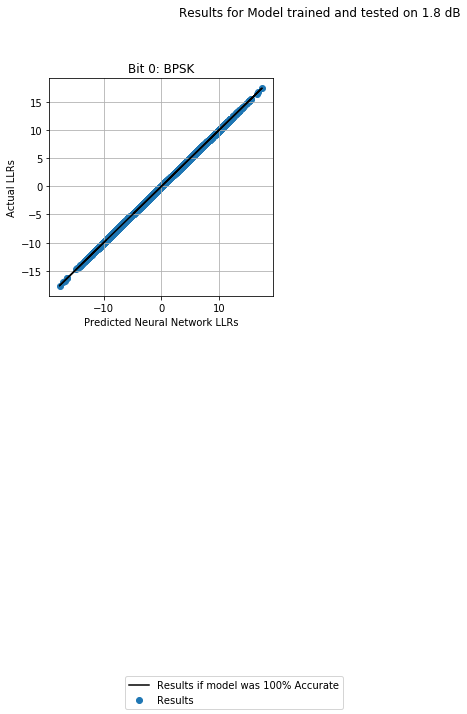

In [13]:
y_pred = [None]*num_outputs
y_pred = model.predict(X_test_single_SNR)

f = plt.figure()
f.set_figheight(10)
f.set_figwidth(10)
for i in range(num_outputs):
  if num_outputs != 1:
    predicted = y_pred[i][:]
  else:
    predicted = y_pred

  plt.subplot(2,2,i+1)
  plt.scatter(np.asarray(predicted), y_test_single_SNR[:,i].reshape([-1,1]))
  plt.plot(y_test_single_SNR[:,i].reshape([-1,1]), y_test_single_SNR[:,i].reshape([-1,1]), 'k')
  plt.xlabel("Predicted Neural Network LLRs")
  plt.ylabel("Actual LLRs")
  plt.title("Bit " + str(i) + ": " + MODULATION)
  plt.grid()

plt.subplots_adjust(wspace=0.5, hspace=0.5)
f.legend(('Results if model was 100% Accurate', 'Results', ), loc = 'lower center')
f.suptitle("Results for Model trained and tested on " + str(SNR) + " dB")
plt.show()

In [31]:
model.save('llr_bpsk_model_single.h5', include_optimizer=False)

!python3 keras_export/convert_model.py llr_bpsk_model_single.h5 bpsk_single.json

2020-03-16 00:15:38.064283: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-03-16 00:15:38.064379: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-03-16 00:15:38.064397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
loading llr_bpsk_model_single.h5
2020-03-16 00:15:38.992912: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: CUDA_ERROR_NO_D

In [32]:
x = np.array([1.39594,0.343259]).reshape([-1,1]).T
print(model.predict(x))

[[8.475088]]


## Evaluate the Model on various SNR

In [0]:
y_test_flattened = [None] * num_outputs

for i in range(num_outputs):
  y_test_flattened[i] = y_test_multiple_SNR[:,i]

# Test model on the validation and test set and report results
score_test = model.evaluate(X_test_multiple_SNR, y_test_flattened, batch_size = 100, verbose=0)

print("Evaluate model on multiple SNR:")
print("---------------------------------------------------")
print("Total Loss: \t\t\t", score_test[0])
for i in range(num_outputs):
  print("Bit " + str(i) + " [Loss, MSE] is: \t\t", score_test[i+ (num_outputs != 1)], "\t, ", score_test[i+ 1 + 2*(num_outputs != 1)])

RuntimeError: ignored

### Plot the LLRs acquired from the neural net vs actual LLRs

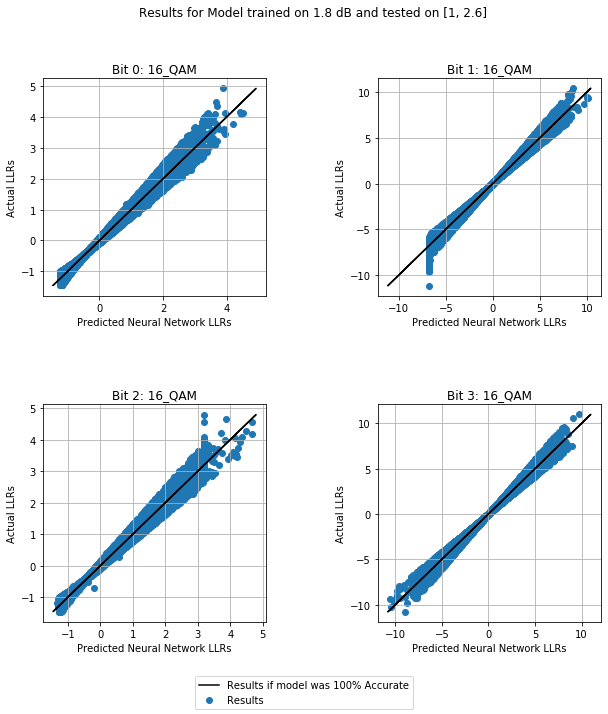

In [0]:
y_pred = [None]*num_outputs
y_pred = model.predict(X_test_multiple_SNR)

f = plt.figure()
f.set_figheight(10)
f.set_figwidth(10)
for i in range(num_outputs):
  if num_outputs != 1:
    predicted = y_pred[i][:]
  else:
    predicted = y_pred

  plt.subplot(2,2,i+1)
  plt.scatter(np.asarray(predicted), y_test_multiple_SNR[:,i].reshape([-1,1]))
  plt.plot(y_test_multiple_SNR[:,i].reshape([-1,1]), y_test_multiple_SNR[:,i].reshape([-1,1]), 'k')
  plt.xlabel("Predicted Neural Network LLRs")
  plt.ylabel("Actual LLRs")
  plt.title("Bit " + str(i) + ": " + MODULATION)
  plt.grid()

f.legend(('Results if model was 100% Accurate', 'Results', ), loc = 'lower center')
f.suptitle("Results for Model trained on " + str(SNR) + " dB" " and tested on [" + str(SNR_RANGE_MIN) + ", " + str(SNR_RANGE_MAX) + "]" )
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Construct Fully Connected Neural Net trained on multiple SNR

## Define the second model. Note that we have multiple outputs corresponding to each bit LLR.

In [0]:
model_input = Input(shape=(X_train_multiple_SNR.shape[1]), name='model_input')
num_outputs = y_train_multiple_SNR.shape[1]
num_layers = 6

x = Dense(128, activation='relu')(model_input)
for i in range(num_layers, 1, -1):
  x = Dense(max(num_outputs*2, 2**i), activation="relu")(x)

output_vec = [None]*num_outputs
for i in range(num_outputs):
  out_layer_name = "LLR_bit_" + str(i+1)
  bit_layer = Dense(4, activation  = 'relu', name = "bit_layer_" + str(i + 1))(x)
  output_vec[i] = Dense(1, activation = "linear", name = out_layer_name)(bit_layer)

model_multiple_snr = Model(inputs = model_input, outputs = output_vec)
model_multiple_snr.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_input (InputLayer)     [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36    

## Train the model on multiple SNR

In [0]:
# Experimented with model parameters:
# Can choose loss function, metrics, optimizer parameters
model_multiple_snr.compile(loss='logcosh',
              optimizer = optimizers.Nadam(),
              metrics = ['mean_squared_error'])

# Since we have one output per bit, store the results of each its own list
y_train_flattened = [None] * num_outputs
y_valid_flattened = [None] * num_outputs
y_test_flattened = [None] * num_outputs

for i in range(num_outputs):
  y_train_flattened[i] = y_train_multiple_SNR[:,i]
  y_valid_flattened[i] = y_valid_multiple_SNR[:,i]
  y_test_flattened[i] = y_test_multiple_SNR[:,i]

history = model_multiple_snr.fit(X_train_multiple_SNR, y_train_flattened, validation_data=(X_valid_multiple_SNR, y_valid_flattened), batch_size=50, epochs=100, verbose = 0)

## Evaluate the model on a various SNR

In [0]:
y_valid_flattened = [None] * num_outputs
y_test_flattened = [None] * num_outputs

for i in range(num_outputs):
  y_valid_flattened[i] = y_valid_multiple_SNR[:,i]
  y_test_flattened[i] = y_test_multiple_SNR[:,i]

# Test model on the validation and test set and report results
score_val = model_multiple_snr.evaluate(X_valid_multiple_SNR, y_valid_flattened, batch_size = 100, verbose=0)
score_test = model_multiple_snr.evaluate(X_test_multiple_SNR, y_test_flattened, batch_size = 100, verbose=0)

print("Evaluate model on the validation set:")
print("---------------------------------------------------")
print("Total Loss: \t\t\t", score_val[0])
for i in range(num_outputs):
  print("Bit " + str(i) + " [Loss, MSE] is: \t\t", score_val[i+ (num_outputs != 1)], "\t, ", score_val[i+ 1 + 2*(num_outputs != 1)])

print("\n\nEvaluate model on the test set:")
print("---------------------------------------------------")
print("Total Loss: \t\t\t", score_test[0])
for i in range(num_outputs):
  print("Bit " + str(i) + " [Loss, MSE] is: \t\t", score_test[i+ (num_outputs != 1)], "\t, ", score_test[i+ 1 + 2*(num_outputs != 1)])

Evaluate model on the validation set:
---------------------------------------------------
Total Loss: 			 0.2509582158592012
Bit 0 [Loss, MSE] is: 		 0.2509582158592012 	,  0.6393128


Evaluate model on the test set:
---------------------------------------------------
Total Loss: 			 0.243916877034102
Bit 0 [Loss, MSE] is: 		 0.243916877034102 	,  0.61294144


### Plot the LLRs acquired from the neural net vs actual LLRs`

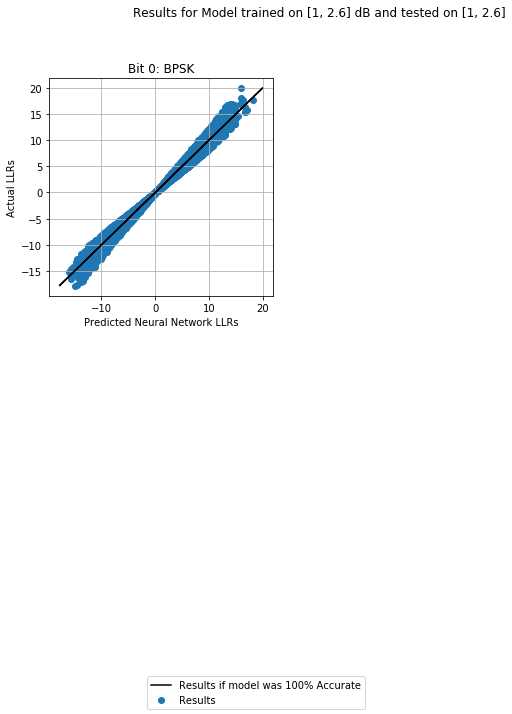

In [0]:
y_pred = [None]*num_outputs
y_pred = model_multiple_snr.predict(X_test_multiple_SNR)

f = plt.figure()
f.set_figheight(10)
f.set_figwidth(10)
for i in range(num_outputs):
  if num_outputs != 1:
    predicted = y_pred[i][:]
  else:
    predicted = y_pred

  plt.subplot(2,2,i+1)
  plt.scatter(np.asarray(predicted), y_test_multiple_SNR[:,i].reshape([-1,1]))
  plt.plot(y_test_multiple_SNR[:,i].reshape([-1,1]), y_test_multiple_SNR[:,i].reshape([-1,1]), 'k')
  plt.xlabel("Predicted Neural Network LLRs")
  plt.ylabel("Actual LLRs")
  plt.title("Bit " + str(i) + ": " + MODULATION)
  plt.grid()

f.legend(('Results if model was 100% Accurate', 'Results', ), loc = 'lower center')
f.suptitle("Results for Model trained on [" + str(SNR_RANGE_MIN) + ", " + str(SNR_RANGE_MAX) + "]" + " dB" " and tested on [" + str(SNR_RANGE_MIN) + ", " + str(SNR_RANGE_MAX) + "]" )
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [0]:
model_multiple_snr.save('llr_bpsk_model.h5', include_optimizer=False)

!python3 keras_export/convert_model.py llr_model.h5 fdeep_model.json


2020-03-15 08:48:12.544187: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-03-15 08:48:12.544292: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-03-15 08:48:12.544307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
loading llr_model.h5
2020-03-15 08:48:13.831396: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CU

In [0]:
x = np.array([1.1,2.2]).reshape([-1,1]).T

model_multiple_snr.predict(x)


[array([[0.8118974]], dtype=float32),
 array([[-3.3678126]], dtype=float32),
 array([[2.994915]], dtype=float32),
 array([[7.1531096]], dtype=float32)]

# Construct Fully Connected Nerual Net trained on Single SNR with Fading

## Define the third model. Note that we have multiple outputs corresponding to each bit LLR.

In [0]:
model_input = Input(shape=(X_train_single_SNR_fade.shape[1]), name='model_input')
num_outputs = y_train_single_SNR_fade.shape[1]
num_layers = 6

x = Dense(128, activation='relu')(model_input)
x = Dropout(0.5)(x)
for i in range(num_layers, 1, -1):
  x = Dense(max(num_outputs*2, 2**i), activation="relu")(x)

output_vec = [None]*num_outputs
for i in range(num_outputs):
  out_layer_name = "LLR_bit_" + str(i+1)
  bit_layer = Dense(4, activation  = 'relu', name = "bit_layer_" + str(i + 1))(x)
  output_vec[i] = Dense(1, activation = "linear", name = out_layer_name)(bit_layer)

model_fade = Model(inputs = model_input, outputs = output_vec)
model_fade.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
model_input (InputLayer)        [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_50 (Dense)                (None, 128)          384         model_input[0][0]                
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 128)          0           dense_50[0][0]                   
__________________________________________________________________________________________________
dense_51 (Dense)                (None, 64)           8256        dropout_3[0][0]                  
____________________________________________________________________________________________

## Train the model on faded symbols with AWGN noise

In [0]:
# Experimented with model parameters:
# Can choose loss function, metrics, optimizer parameters
model_fade.compile(loss='logcosh',
              optimizer = optimizers.Nadam(),
              metrics = ['mean_squared_error'])

# Since we have one output per bit, store the results of each its own list
y_train_flattened = [None] * num_outputs
y_valid_flattened = [None] * num_outputs
y_test_flattened = [None] * num_outputs

for i in range(num_outputs):
  y_train_flattened[i] = y_train_single_SNR_fade[:,i]
  y_valid_flattened[i] = y_valid_single_SNR_fade[:,i]
  y_test_flattened[i] = y_test_single_SNR_fade[:,i]

history = model_fade.fit(X_train_single_SNR_fade, y_train_flattened, validation_data=(X_valid_single_SNR_fade, y_valid_flattened), batch_size=50, epochs=100, verbose = 0)

KeyboardInterrupt: ignored

## Evaluate the model on single SNR with fading

In [0]:
y_valid_flattened = [None] * num_outputs
y_test_flattened = [None] * num_outputs

for i in range(num_outputs):
  y_valid_flattened[i] = y_valid_single_SNR_fade[:,i]
  y_test_flattened[i] = y_test_single_SNR_fade[:,i]

# Test model on the validation and test set and report results
score_val = model_fade.evaluate(X_valid_single_SNR_fade, y_valid_flattened, batch_size = 100, verbose=0)
score_test = model_fade.evaluate(X_test_single_SNR_fade, y_test_flattened, batch_size = 100, verbose=0)

print("Evaluate model on the validation set:")
print("---------------------------------------------------")
print("Total Loss: \t\t\t", score_val[0])
for i in range(num_outputs):
  print("Bit " + str(i) + " [Loss, MSE] is: \t\t", score_val[i+ int(num_outputs != 1)], "\t, ", score_val[i+ 1 + 2*int(num_outputs != 1)])

print("\n\nEvaluate model on the test set:")
print("---------------------------------------------------")
print("Total Loss: \t\t\t", score_test[0])
for i in range(num_outputs):
  print("Bit " + str(i) + " [Loss, MSE] is: \t\t", score_test[i+ int(num_outputs != 1)], "\t, ", score_test[i+ 1 + 2*int(num_outputs != 1)])

In [0]:
y_pred = [None]*num_outputs
y_pred = model_fade.predict(X_test_single_SNR_fade)

f = plt.figure()
f.set_figheight(10)
f.set_figwidth(10)
for i in range(num_outputs):
  if num_outputs != 1:
    predicted = y_pred[i][:]
  else:
    predicted = y_pred

  plt.subplot(2,2,i+1)
  plt.scatter(np.asarray(predicted), y_test_single_SNR_fade[:,i].reshape([-1,1]))
  plt.plot(y_test_single_SNR_fade[:,i].reshape([-1,1]), y_test_single_SNR_fade[:,i].reshape([-1,1]), 'k')
  plt.xlabel("Predicted Neural Network LLRs")
  plt.ylabel("Actual LLRs")
  plt.title("Bit " + str(i) + ": " + MODULATION)
  plt.grid()

f.legend(('Results if model was 100% Accurate', 'Results', ), loc = 'lower center')
f.suptitle("Model trained and tested on Rayleigh fading channel with variance " + str(FADE_VAR) + " and AWGN noise")
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()